# Географический анализ

## 1. Проанализируйте географическое распределение сделок по городам.

In [2]:
import pandas as pd

deals_df = pd.read_pickle("deals_cleaned.pkl")

In [4]:
# count the number of records by city
city_counts = deals_df['City'].value_counts()
city_counts

City
Berlin             283
München             91
Hamburg             82
Nürnberg            56
Düsseldorf          54
                  ... 
Waren                1
Löbau                1
Riesa                1
Bad Gandersheim      1
Wenden               1
Name: count, Length: 869, dtype: int64

In [5]:
deals_df['City'].nunique()

869

In [6]:
successful_deals_df = deals_df[(deals_df['Stage'] == 'Payment Done') & (deals_df['Offer Total Amount'].notna())]

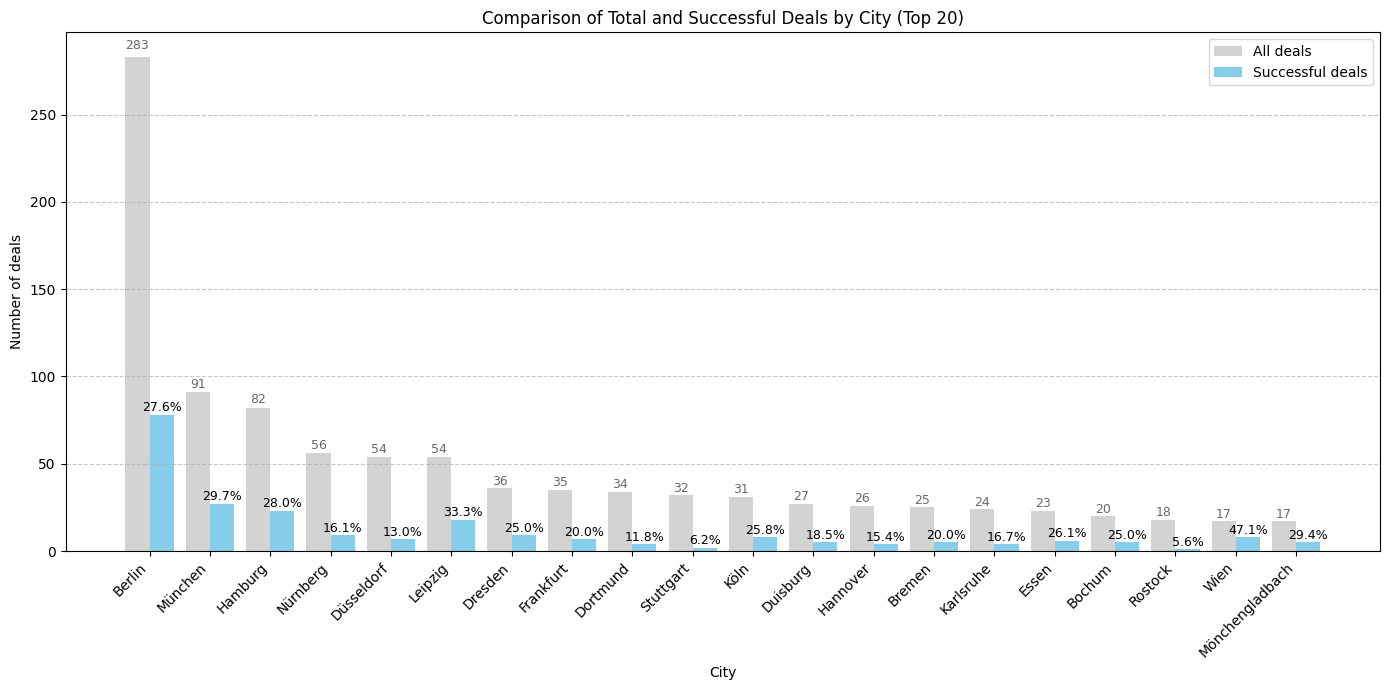

In [8]:
# Let's conduct a comparative analysis of the total number of all deals and the number of successful deals by city

import pandas as pd
import matplotlib.pyplot as plt

# Count total number of deals by city
total_counts = deals_df['City'].value_counts()

# Count only successful deals by city
success_counts = successful_deals_df['City'].value_counts()

# Select top 20 cities by total number of deals
top_20_cities = total_counts.head(20).index

# Get total deal counts only for the top 20 cities
total_top20 = total_counts[top_20_cities]

# Get success deal counts for the same top 20 cities
# Use reindex to fill in 0 for cities with no successful deals
success_top20 = success_counts[top_20_cities].reindex(top_20_cities, fill_value=0)

# Create a comparative bar plot
plt.figure(figsize=(14, 7))
bar_width = 0.4
x = range(len(top_20_cities))

# Plot total deals as gray bars
plt.bar(x, total_top20, width=bar_width, label='All deals', color='lightgray')

# add absolute values above the gray bars (all deals)
for i, total in enumerate(total_top20):
    plt.text(i, total + total * 0.01, str(total), ha='center', va='bottom', fontsize=9, color='dimgray')

# Plot successful deals as blue bars next to the gray ones
plt.bar([i + bar_width for i in x], success_top20, width=bar_width, label='Successful deals', color='skyblue')

# Add labels and title
plt.xlabel('City')
plt.ylabel('Number of deals')
plt.title('Comparison of Total and Successful Deals by City (Top 20)')

# Rotate x-axis labels for better readability
plt.xticks([i + bar_width / 2 for i in x], top_20_cities, rotation=45, ha='right')

# Add legend and gridlines
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on top of the successful bars
for i, (total, success) in enumerate(zip(total_top20, success_top20)):
    percent = (success / total * 100) if total != 0 else 0
    plt.text(i + bar_width, success + success * 0.01, f'{percent:.1f}%', ha='center', va='bottom', fontsize=9, color='black')


plt.tight_layout()
plt.show()

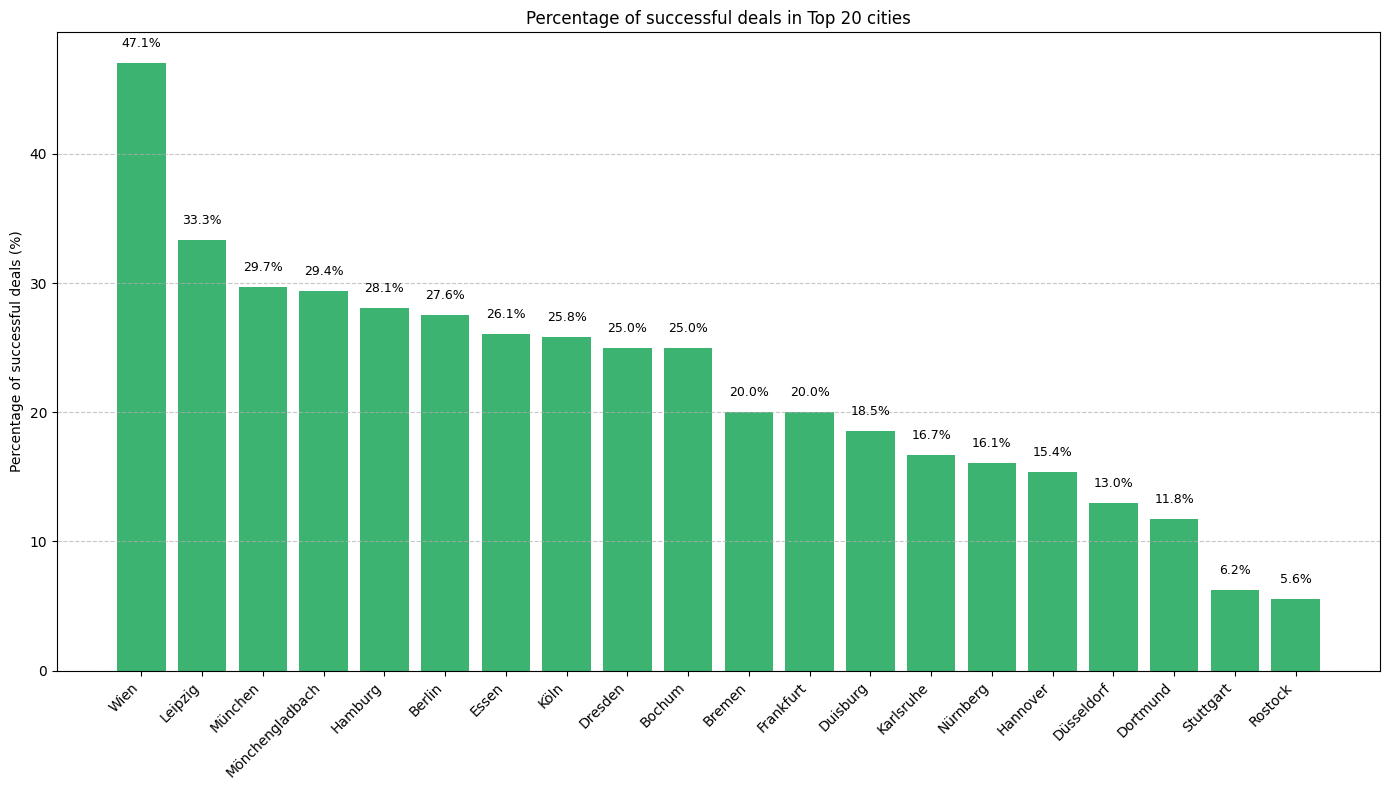

In [9]:
# Let's compare conversion rates for successful deals in 20 cities

import pandas as pd
import matplotlib.pyplot as plt

# Calculation of the number of all and successful deals by city
total_counts = deals_df['City'].value_counts()
success_counts = successful_deals_df['City'].value_counts()

# Select only the top 20 by total number of deals
top_20_cities = total_counts.head(20).index

# Filter by top 20
total_top20 = total_counts[top_20_cities]
success_top20 = success_counts[top_20_cities].reindex(top_20_cities, fill_value=0)

# Calculating the percentage of successful transactions
success_rate = (success_top20 / total_top20 * 100).round(2)

# Sort in descending order
success_rate = success_rate.sort_values(ascending=False)

# Visualization of the percentage of successful transactions
plt.figure(figsize=(14, 8))
bars = plt.bar(success_rate.index, success_rate, color='mediumseagreen')

plt.ylabel('Percentage of successful deals (%)')
plt.title('Percentage of successful deals in Top 20 cities')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Adding percentage captions above the columns
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

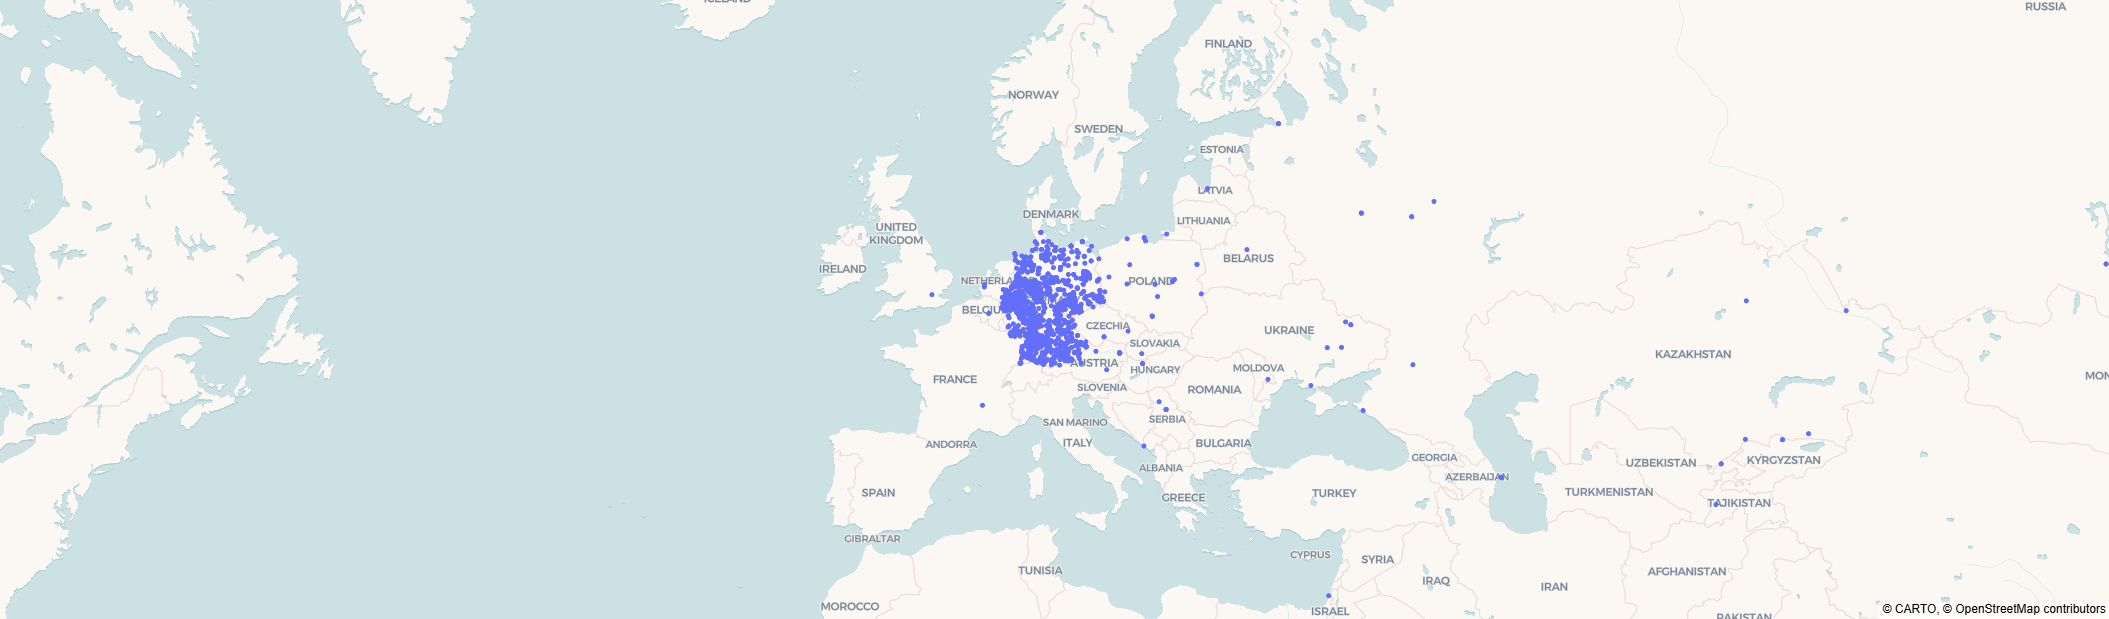

In [14]:
# Display on the map the cities where all the deals took place

import plotly.express as px

# Filter lines that have coordinates
map_df = deals_df.dropna(subset=['Latitude', 'Longitude'])

# Create a map
fig = px.scatter_map(
    map_df,
    lat='Latitude',
    lon='Longitude',
    hover_name='City',  # Можно поменять на City или что-то ещё
    hover_data=['City', 'German level'],
    zoom=3,
    height=600
)

# Customizing the appearance of the map
fig.update_layout(
    mapbox_style="satellite-streets",  # Else "open-street-map", "carto-positron", "stamen-terrain", "satellite-streets", и т.п.
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show()


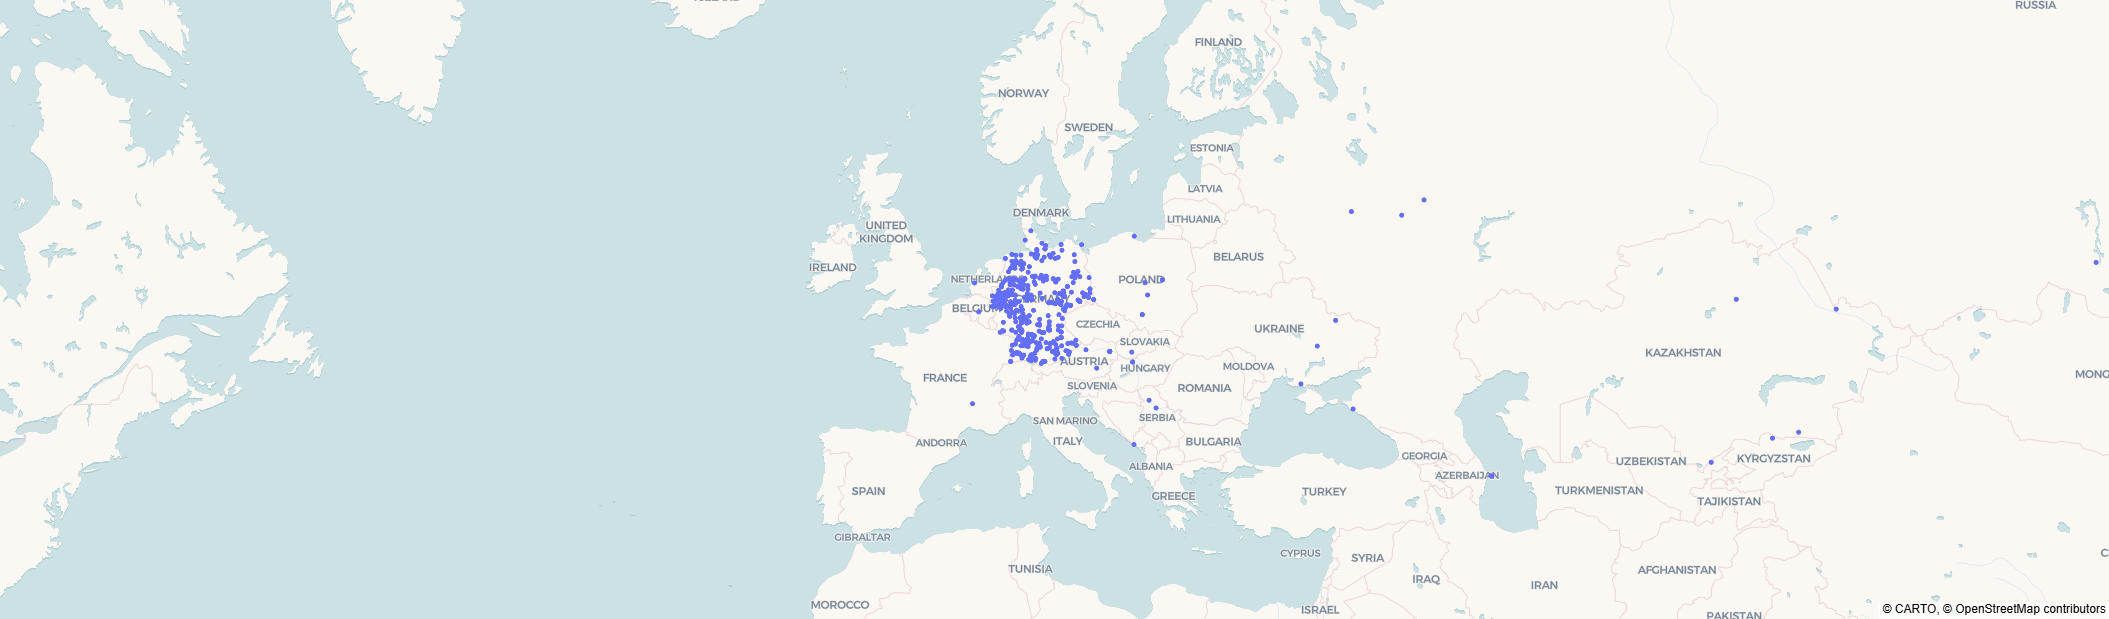

In [15]:
# Display on the map the cities where successful the deals took place

import plotly.express as px

# Filter lines that have coordinates
map_df = successful_deals_df.dropna(subset=['Latitude', 'Longitude'])

# Create a map
fig = px.scatter_map(
    map_df,
    lat='Latitude',
    lon='Longitude',
    hover_name='City',  
    hover_data=['City', 'German level'],
    zoom=3,
    height=600
)

# Customizing the appearance of the map
fig.update_layout(
    mapbox_style="satellite-streets",  # Else "open-street-map", "carto-positron", "stamen-terrain", "satellite-streets", и т.п.
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show()

## 2. Изучите влияние уровня знания немецкого языка на успешность сделок в разных городах.

In [17]:
# Create a new boolean column 'is_success' that marks if the deal stage is 'Payment Done'
deals_df['is_success'] = (deals_df['Stage'] == 'Payment Done') & (deals_df['Offer Total Amount'].notna())

# Filter rows where 'Level of Deutsch' is not null
filtered_by_lang = deals_df[deals_df['German level'].notna()]
filtered_by_lang

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Campaign,SLA,Source,Payment Type,...,Initial Amount Paid,Offer Total Amount,Contact Name,City,German level,Create_to_Close_Days,Latitude,Longitude,SLA_range,is_success
53,5805028000056568397,Paula Underwood,NaT,NaN,Registered on Webinar,NaN,NaN,NaT,organic,NaN,...,NaN,NaN,5805028000020664131,Prenzlau,B1,NaN,53.3167,13.8667,NaN,False
56,5805028000056558351,Ulysses Adams,NaT,C - Low,Waiting For Payment,NaN,NaN,0 days 00:09:49,smm,NaN,...,1000.0,9000.0,5805028000056578244,Dortmund,B1,NaN,51.5136,7.4653,Fast (5-15 min),False
67,5805028000056564131,Ben Hall,NaT,D - Non Target,Waiting For Payment,NaN,20.05.24interests_de,0 days 12:51:39,facebook ads,NaN,...,1000.0,11000.0,5805028000056575100,München,A2,NaN,48.1371,11.5754,Very slow (>60 min),False
85,5805028000056378468,Ulysses Adams,NaT,NaN,Registered on Webinar,NaN,webinar1906,NaT,crm,NaN,...,NaN,NaN,5805028000027735302,Berlin,B2,NaN,52.5160,13.4041,NaN,False
93,5805028000056374135,Ulysses Adams,NaT,C - Low,Waiting For Payment,NaN,03.07.23women,0 days 02:42:33,facebook ads,NaN,...,1000.0,11000.0,5805028000056362225,Offenbach am Main,B1,NaN,50.1055,8.7668,Very slow (>60 min),False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21376,5805028000024632568,Julia Nelson,2024-01-08,E - Non Qualified,Lost,Duplicate,02.07.23wide_de,0 days 01:55:58,facebook ads,NaN,...,NaN,NaN,5805028000024640104,Hannover,B1,1.0,52.3759,9.7320,Very slow (>60 min),False
21379,5805028000038064604,Charlie Davis,2024-03-18,E - Non Qualified,Lost,Duplicate,NaN,0 days 01:04:26,webinar,NaN,...,NaN,NaN,5805028000027427115,Oberhausen,B1,0.0,51.4696,6.8514,Very slow (>60 min),False
21381,5805028000038085086,Paula Underwood,2024-03-18,E - Non Qualified,Lost,Duplicate,NaN,NaT,crm,NaN,...,NaN,NaN,5805028000028006930,Hennef,B2,0.0,50.7754,7.2831,NaN,False
21389,5805028000046297317,Charlie Davis,2024-04-26,E - Non Qualified,Lost,Duplicate,webinar1604,NaT,smm,NaN,...,NaN,NaN,5805028000033674083,Bremen,B1,2.0,53.0834,8.8106,NaN,False


In [18]:
# Group by 'City' and 'German level', then calculate total and successful deals
grouped_lang_conv = (
    filtered_by_lang.groupby(['City', 'German level'], observed=True)['is_success']
    .agg(['count', 'sum'])  # 'count' = total deals, 'sum' = successful deals
    .rename(columns={'count': 'Total Deals', 'sum': 'Successful Deals'})
)

# Calculate success rate percentage
grouped_lang_conv['Success Rate %'] = (grouped_lang_conv['Successful Deals'] / grouped_lang_conv['Total Deals']) * 100

# Reset index to turn grouped columns into regular columns
grouped_lang_conv = grouped_lang_conv.reset_index()

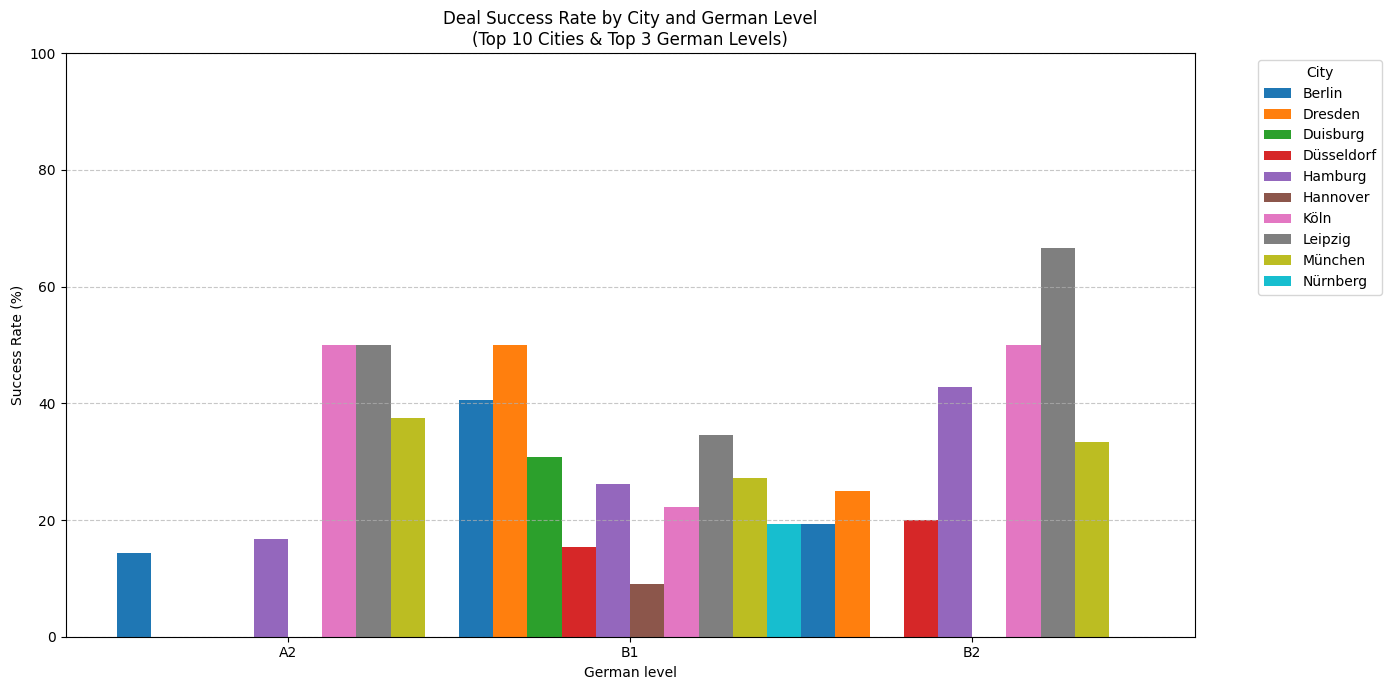

In [19]:
# Let's look at conversion for the top 10 cities and top 3 language levels

import matplotlib.pyplot as plt
import numpy as np

# Filter top 3 German levels and top 10 cities
top_levels = filtered_by_lang['German level'].value_counts().head(3).index
top_cities = filtered_by_lang['City'].value_counts().head(10).index

grouped_filtered = grouped_lang_conv[
    (grouped_lang_conv['German level'].isin(top_levels)) &
    (grouped_lang_conv['City'].isin(top_cities))
]

# Prepare data for plotting
# Create pivot table with German level as rows, cities as columns, values are success rates
pivot = grouped_filtered.pivot(index='German level', columns='City', values='Success Rate %').fillna(0)

levels = pivot.index.tolist()
cities = pivot.columns.tolist()

# Bar width and positions
bar_width = 0.1
x = np.arange(len(levels))

plt.figure(figsize=(14, 7))

# Plot bars for each city, shifted on x-axis
for i, city in enumerate(cities):
    plt.bar(x + i * bar_width, pivot[city], width=bar_width, label=city)

# Labels and title
plt.xlabel('German level')
plt.ylabel('Success Rate (%)')
plt.title('Deal Success Rate by City and German Level\n(Top 10 Cities & Top 3 German Levels)')
plt.xticks(x + bar_width * (len(cities)-1) / 2, levels)
plt.ylim(0, 100)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

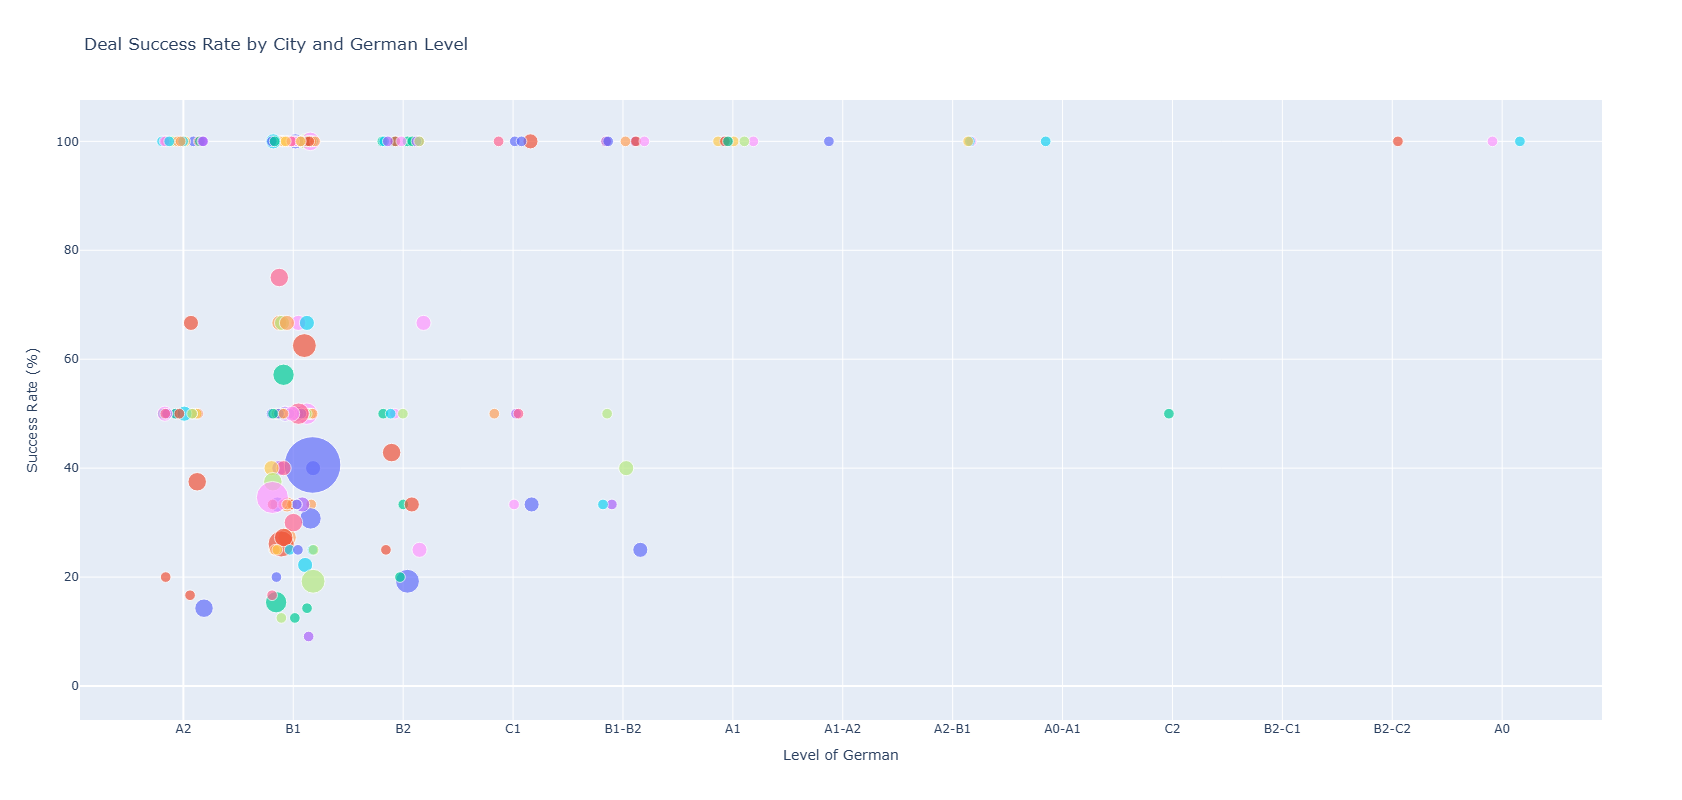

In [23]:
import plotly.express as px
import numpy as np

# Make an overview scatter plot for all cities and language levels

# Map 'German level' to numeric values (int), so that it would be possible to add to them jitter
level_order = grouped_lang_conv['German level'].unique()
level_map = {level: i for i, level in enumerate(level_order)}
grouped_lang_conv['Level_Num'] = grouped_lang_conv['German level'].map(level_map).astype(float)


# Add small random noise (jitter) to the numeric level to avoid overlapping bubbles
np.random.seed(42)
grouped_lang_conv['Level_Num_Jitter'] = grouped_lang_conv['Level_Num'] + np.random.uniform(-0.2, 0.2, size=len(grouped_lang_conv))

fig = px.scatter(
    grouped_lang_conv,
    x='Level_Num_Jitter', # jittered numeric level of german
    y='Success Rate %',
    size='Successful Deals', # size of bubble by total deals count
    color='City', # color by city for distinction
    hover_name='City',
    hover_data={'German level': True, 'Total Deals': True, 'Level_Num_Jitter': False},
    labels={
        'Level_Num_Jitter': 'Level of German',
        'Success Rate %': 'Success Rate (%)'
    },
    title='Deal Success Rate by City and German Level',
    width=1000,   # width in pixels
    height=800,  # height in pixels
    size_max=40
)

# Customize x-axis ticks to show the real German levels (without jitter)
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=list(level_map.values()),
        ticktext=list(level_map.keys()),
        title='Level of German'
    ),
    yaxis=dict(title='Success Rate (%)'),
    showlegend=False
)

fig.show()

In [24]:
# Cities with 0% conversion
cities_zero = grouped_lang_conv[grouped_lang_conv['Success Rate %'] == 0]
print("Cities with 0% conversion:")
print(cities_zero[['City', 'Success Rate %', 'Total Deals']])

# Cities with 100% conversion
cities_hundred = grouped_lang_conv[grouped_lang_conv['Success Rate %'] == 100]
print("Cities with 100% conversion:")
print(cities_hundred[['City', 'Success Rate %', 'Total Deals']])

Cities with 0% conversion:
             City  Success Rate %  Total Deals
0          Aachen             0.0            1
2      Adelschlag             0.0            2
5        Albstadt             0.0            1
6      Aldenhoven             0.0            1
8       Allendorf             0.0            1
..            ...             ...          ...
591     Wolfsburg             0.0            1
593     Wolfsburg             0.0            1
594         Worms             0.0            1
598      Würzburg             0.0            4
600  Zella-Mehlis             0.0            1

[365 rows x 3 columns]
Cities with 100% conversion:
              City  Success Rate %  Total Deals
3            Ahaus           100.0            1
4         Aichwald           100.0            1
7           Alfeld           100.0            1
23   Bad Berleburg           100.0            1
29     Bad Nauheim           100.0            1
..             ...             ...          ...
580    Wiefelstede  

In [25]:
grouped_lang_conv 

,City,German level,Total Deals,Successful Deals,Success Rate %,Level_Num,Level_Num_Jitter
0,Aachen,A2,1,0,0.0,0.0,-0.050184
1,Aachen,B1,5,2,40.0,1.0,1.180286
2,Adelschlag,B1,2,0,0.0,1.0,1.092798
3,Ahaus,B2,1,1,100.0,2.0,2.039463
4,Aichwald,B1,1,1,100.0,1.0,0.862407
...,...,...,...,...,...,...,...
599,Zeitz,B1,2,1,50.0,1.0,0.816347
600,Zella-Mehlis,B1,1,0,0.0,1.0,0.867574
601,Zorneding,B1,2,1,50.0,1.0,0.911436
602,Zwickau,A2,1,1,100.0,0.0,-0.129196


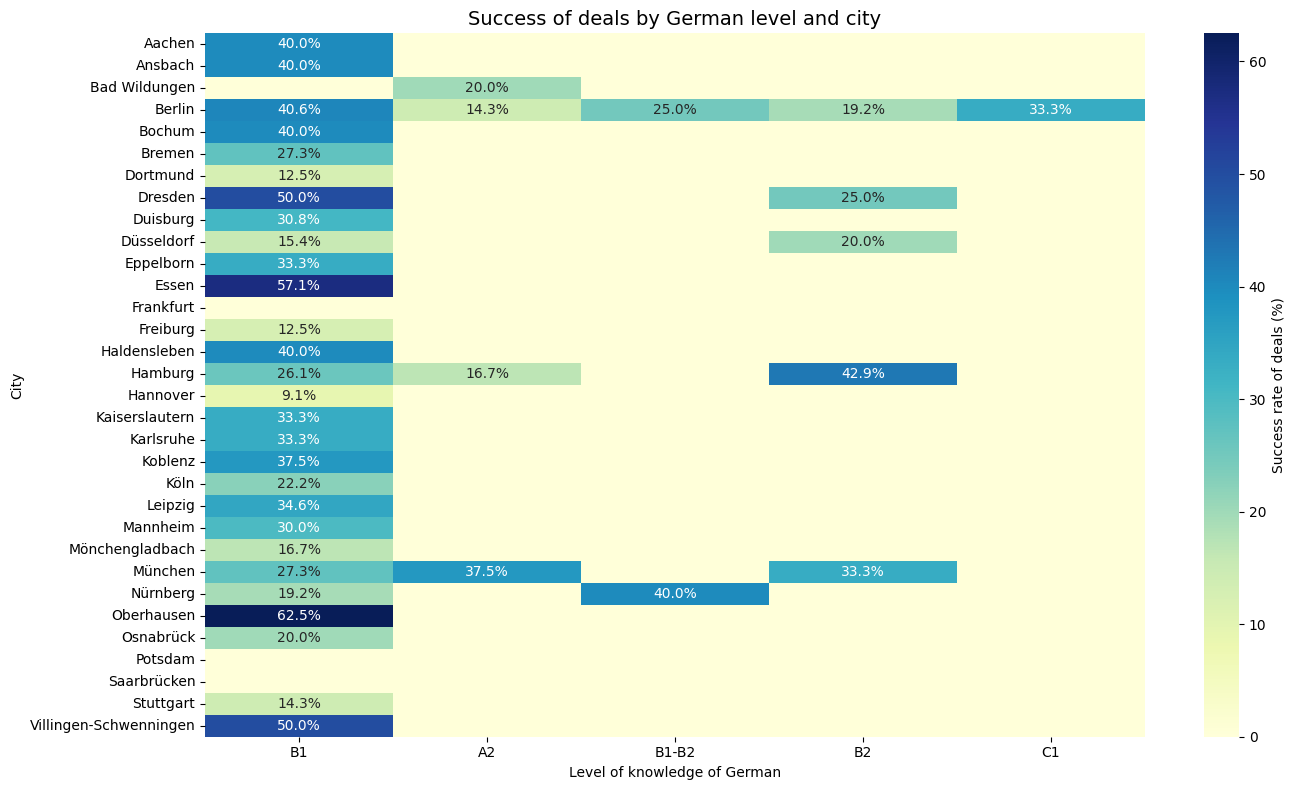

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter pairs (city + level) with at least 5 deals
filtered = grouped_lang_conv[grouped_lang_conv['Total Deals'] >= 5]

# # Building a pivot table (heat map)
pivot_table = filtered.pivot(index='City', columns='German level', values='Success Rate %').fillna(0)

# Annotations with percentage formatting
annot = pivot_table.map(lambda x: f"{x:.1f}%" if x != 0 else "")

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=annot, fmt="", cmap="YlGnBu", cbar_kws={'label': 'Success rate of deals (%)'})
plt.title("Success of deals by German level and city", fontsize=14)
plt.xlabel("Level of knowledge of German")
plt.ylabel("City")
plt.tight_layout()
plt.show()

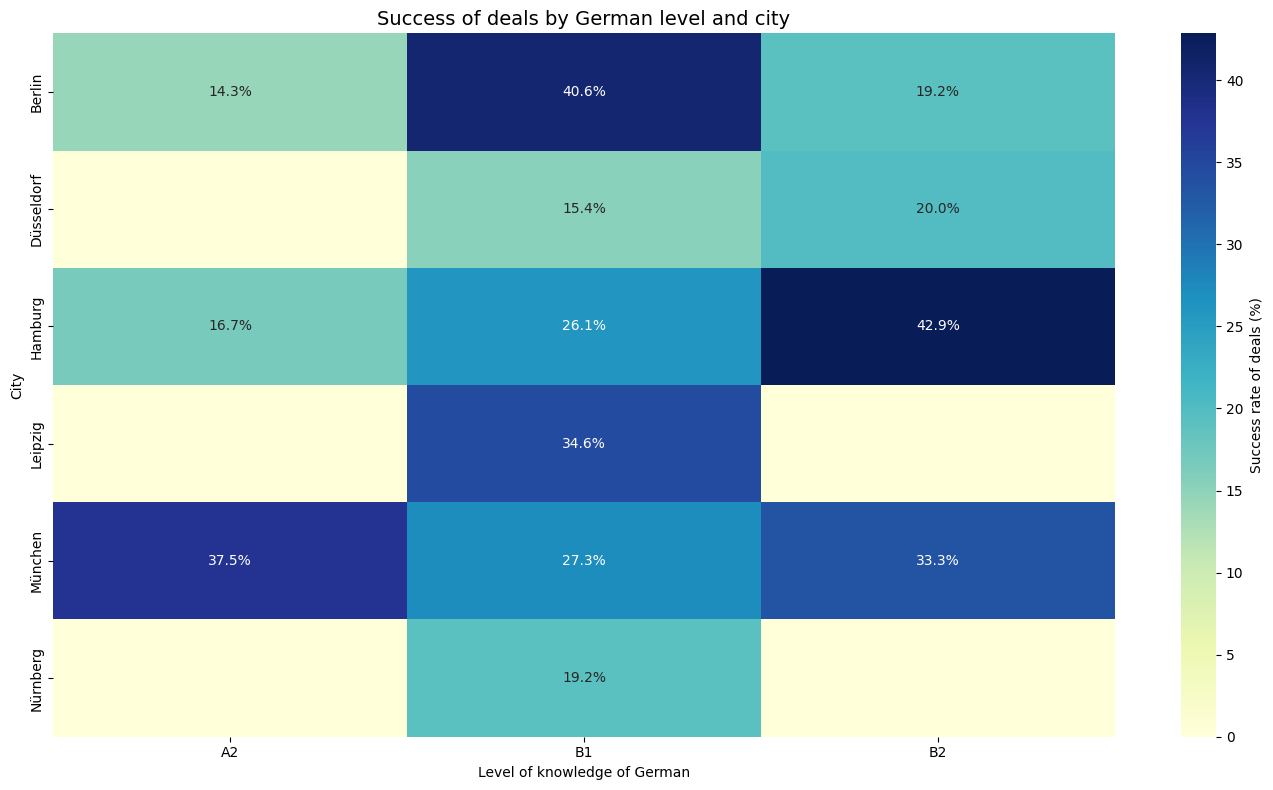

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter pairs (city + level) with at least 5 deals
filtered = grouped_lang_conv[grouped_lang_conv['Total Deals'] >= 5]

# e-calculate the levels and cities that remain after filtering
level_counts = filtered.groupby('German level', observed=True)['Total Deals'].sum()
valid_levels = level_counts[level_counts >= 20].index

city_counts = filtered.groupby('City', observed=True)['Total Deals'].sum()
valid_cities = city_counts[city_counts >= 20].index

# Filter by cities and levels that remain
filtered = filtered[
    (filtered['German level'].isin(valid_levels)) &
    (filtered['City'].isin(valid_cities))
]

# Building a pivot table (heat map)
pivot_table = filtered.pivot(index='City', columns='German level', values='Success Rate %').fillna(0)

# Annotations with percentage formatting
annot = pivot_table.map(lambda x: f"{x:.1f}%" if x != 0 else "")

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=annot, fmt="", cmap="YlGnBu", cbar_kws={'label': 'Success rate of deals (%)'})
plt.title("Success of deals by German level and city", fontsize=14)
plt.xlabel("Level of knowledge of German")
plt.ylabel("City")
plt.tight_layout()
plt.show()

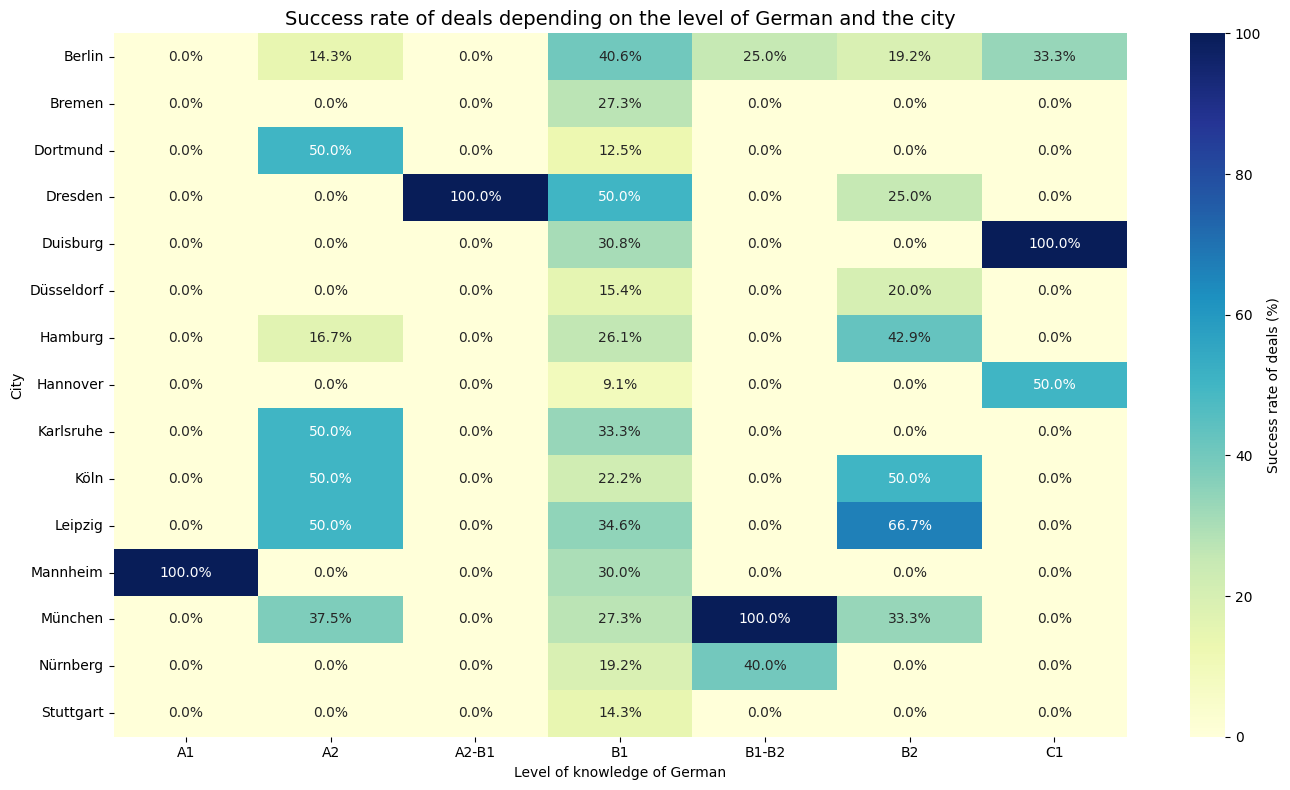

In [34]:
# select the top 15 cities by deals amount
top_cities = grouped_lang_conv.groupby('City')['Total Deals'].sum().sort_values(ascending=False).head(15).index

# leave only those cities and levels with at least 5 deals
level_counts = grouped_lang_conv.groupby('German level', observed=False)['Total Deals'].sum()
valid_levels = level_counts[level_counts >= 10].index

filtered = grouped_lang_conv[
    (grouped_lang_conv['City'].isin(top_cities)) & 
    (grouped_lang_conv['German level'].isin(valid_levels))
]

pivot_table = filtered.pivot(index='City', columns='German level', values='Success Rate %').fillna(0)
annot = pivot_table.map(lambda x: f"{x:.1f}%")

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=annot, fmt="", cmap="YlGnBu", cbar_kws={'label': 'Success rate of deals (%)'})
plt.title("Success rate of deals depending on the level of German and the city", fontsize=14)
plt.xlabel("Level of knowledge of German")
plt.ylabel("City")
plt.tight_layout()
plt.show()

In [15]:
grouped_lang_conv

,City,Level of Deutsch,Total Deals,Successful Deals,Success Rate %,Level_Num,Level_Num_Jitter
0,Aachen,A2,1,0,0.0,0.0,-0.050184
1,Aachen,B1,5,2,40.0,1.0,1.180286
2,Adelschlag,B1,2,0,0.0,1.0,1.092798
3,Ahaus,B2,1,1,100.0,2.0,2.039463
4,Aichwald,B1,1,1,100.0,1.0,0.862407
...,...,...,...,...,...,...,...
599,Zeitz,B1,2,1,50.0,1.0,0.816347
600,Zella-Mehlis,B1,1,0,0.0,1.0,0.867574
601,Zorneding,B1,2,1,50.0,1.0,0.911436
602,Zwickau,A2,1,1,100.0,0.0,-0.129196


In [16]:
grouped_lang_conv['Success Count'] = grouped_lang_conv['Successful Deals']
grouped_lang_conv['Fail Count'] = grouped_lang_conv['Total Deals'] - grouped_lang_conv['Success Count']

In [17]:
from scipy.stats import chi2_contingency

# Группировка по уровню языка
pivot_level = grouped_lang_conv.groupby('Level of Deutsch', observed=False)[['Success Count', 'Fail Count']].sum()

# Хи-квадрат тест: влияние уровня языка на успешность
chi2_level, p_level, dof_level, expected_level = chi2_contingency(pivot_level)

print("Chi-squared (language level):", chi2_level)
print("p-value:", p_level)

Chi-squared (language level): 14.83736391191057
p-value: 0.25045132382407886


In [18]:
# Строим таблицу по городам
pivot_city = grouped_lang_conv.groupby('City')[['Success Count', 'Fail Count']].sum()

# Хи-квадрат тест: влияние города на успешность
chi2_city, p_city, dof_city, expected_city = chi2_contingency(pivot_city)

print("Chi-squared (city):", chi2_city)
print("p-value:", p_city)

Chi-squared (city): 457.3298814429419
p-value: 0.604073887667823
